# Easy Visa Prediction Analysis

### Importing Libraries

In [3]:
import warnings

warnings.filterwarnings('ignore')

# data manipulation libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# modeling libraries
from sklearn.model_selection import train_test_split, GridSearchCV

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, roc_auc_score, roc_curve, \
    auc, precision_recall_curve, recall_score, precision_score

### Importing Data

In [4]:
# original data
visa = pd.read_csv('EasyVisa.csv')

# copying the data to avoid any changes in the original data
data = visa.copy()

### Data Information

In [5]:
data

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [6]:
data.info()
# data is full and there is no missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [7]:
print('There is {} rows, and {} columns in the data'.format(data.shape[0], data.shape[1]))

There is 25480 rows, and 12 columns in the data


In [8]:
print('The columns are:')
data.columns

The columns are:


Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [9]:
print('There are {} duplicated rows in the data.'.format(data.duplicated().sum()))

There are 0 duplicated rows in the data.


### Data Exploration

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


**Observations:**
* The range of the number of employees in a company is huge. There are some anomalies in the data as we can see that the minimum number of employees is equal to -26, which is not possible. We will have to fix this.
* The year of establishment of companies ranges from 1800 to 2016, which seems fine.
* The average prevailing wage is 74455.81. There's also a very huge difference in 75th percentile and maximum value which indicates there might be outliers present in this column.

### Fixing the negative values in the number of employees column

In [11]:
data.loc[data.no_of_employees < 0]

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
245,EZYV246,Europe,Master's,N,N,-25,1980,Northeast,39452.9900,Year,Y,Certified
378,EZYV379,Asia,Bachelor's,N,Y,-11,2011,Northeast,32506.1400,Year,Y,Denied
832,EZYV833,South America,Master's,Y,N,-17,2002,South,129701.9400,Year,Y,Certified
2918,EZYV2919,Asia,Master's,Y,N,-26,2005,Midwest,112799.4600,Year,Y,Certified
6439,EZYV6440,Asia,Bachelor's,N,N,-14,2013,South,103.9700,Hour,Y,Denied
6634,EZYV6635,Asia,Bachelor's,Y,N,-26,1923,West,5247.3200,Year,Y,Denied
7224,EZYV7225,Europe,Doctorate,N,N,-25,1998,Midwest,141435.9500,Year,Y,Certified
7281,EZYV7282,Asia,High School,N,N,-14,2000,Midwest,58488.5000,Year,Y,Denied
7318,EZYV7319,Asia,Bachelor's,Y,Y,-26,2006,South,115005.6100,Year,Y,Certified
7761,EZYV7762,Asia,Master's,N,N,-11,2009,Midwest,38457.5100,Year,Y,Certified


In [12]:
data.loc[data.no_of_employees < 0, 'no_of_employees'] = abs(data.loc[data.no_of_employees < 0, 'no_of_employees'])

In [13]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.089207,22877.917453,11.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


### Let's check the count of each unique category in each of the categorical columns

In [14]:
cat_col = data.select_dtypes(include='object').columns

for i in cat_col:
    print('----------------------DIVIDED-------------------------')
    print('The count of each unique category in {} column is:'.format(i))
    print(data[i].value_counts())


----------------------DIVIDED-------------------------
The count of each unique category in case_id column is:
case_id
EZYV01       1
EZYV16995    1
EZYV16993    1
EZYV16992    1
EZYV16991    1
            ..
EZYV8492     1
EZYV8491     1
EZYV8490     1
EZYV8489     1
EZYV25480    1
Name: count, Length: 25480, dtype: int64
----------------------DIVIDED-------------------------
The count of each unique category in continent column is:
continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64
----------------------DIVIDED-------------------------
The count of each unique category in education_of_employee column is:
education_of_employee
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: count, dtype: int64
----------------------DIVIDED-------------------------
The count of each unique category in has_job_experience column is:
has_job_e

**Observations:**
* Most of the applications in data are from Asians followed by Europeans.
* Most of the applicants have a bachelor's degree followed by a master's degree.
* Most of the applicants have job experience and do not require job training.
* Most applicants have their worksite in the Northeast region of the US.
* Most applicants will yearly unit of wage.
* Most of the visa applications are for full-time job positions.
* The target column case status is imbalanced with many applicants having a certified visa.

In [15]:
# check the number of unique values in case id
data.case_id.nunique()

25480

* All the values in the case id column are unique.
* We can drop this column.

In [16]:
data.drop('case_id', axis=1, inplace=True)

In [17]:
data.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


### Univariate Analysis

In [18]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=50):
    """ 
    Boxplot and histogram combined
    
    data : dataframe
    feature : dataframe column
    figsize : size of figure
    ked : kdeplot boolean
    bins : number of bins
    """

    figs, (ax_box, ax_hist) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid
        sharex=True,  # Share x-axis
        figsize=figsize,
        dpi=100,
        gridspec_kw={"height_ratios": (0.25, 0.75)}  # Heights of the axes proportions
    )

    sns.boxplot(
        data=data,
        width=0.4,
        x=feature,
        ax=ax_box,
        showmeans=True,  # Show the arithmetic mean,
        color='red'
    )

    sns.histplot(
        data=data,
        x=feature,
        ax=ax_hist,
        kde=kde,  # kde plot
        bins=bins
    )

    # Add a line for the mean.
    ax_hist.axvline(
        data[feature].mean(),
        color='green',
        linestyle='--'
    )

    # Add a line for the median.
    ax_hist.axvline(
        data[feature].median(),
        color='black',
        linestyle='-'
    )

#### observations on number of employees

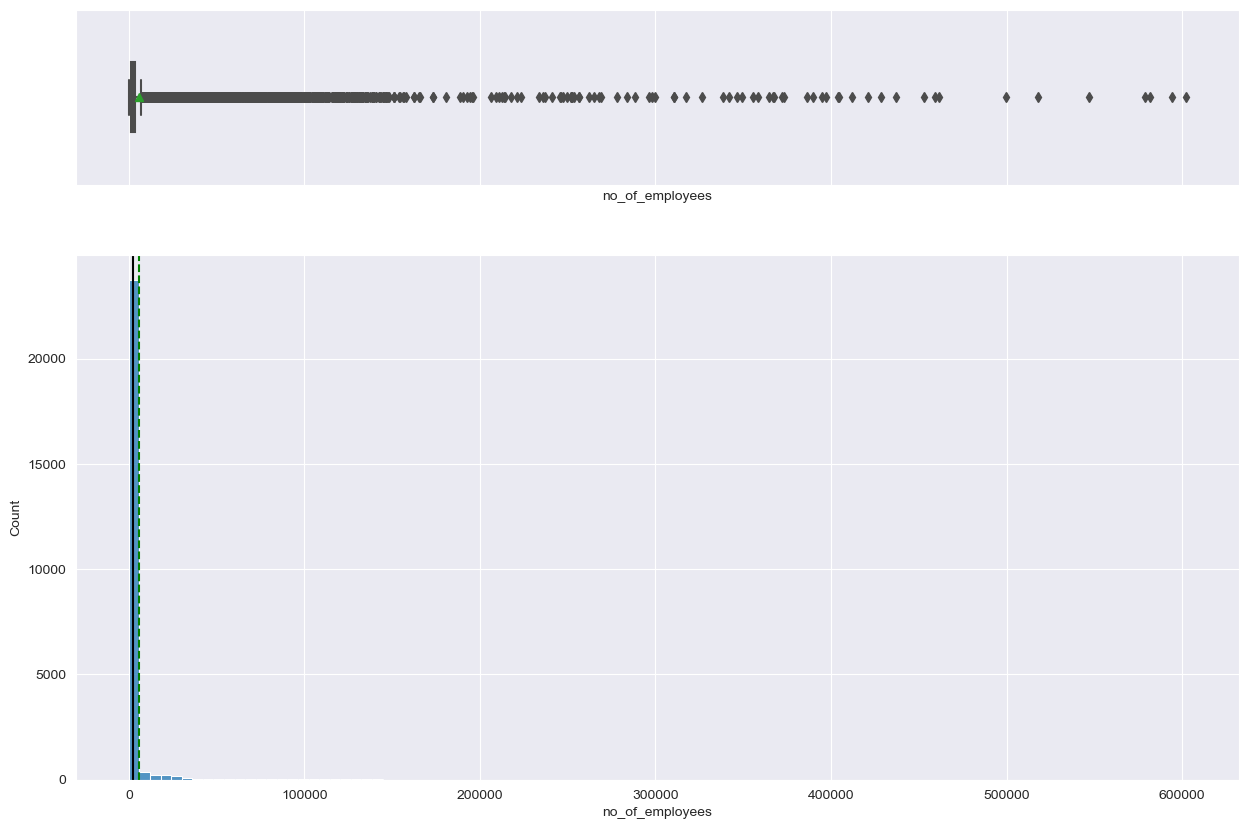

In [19]:
histogram_boxplot(data, 'no_of_employees', bins=100)

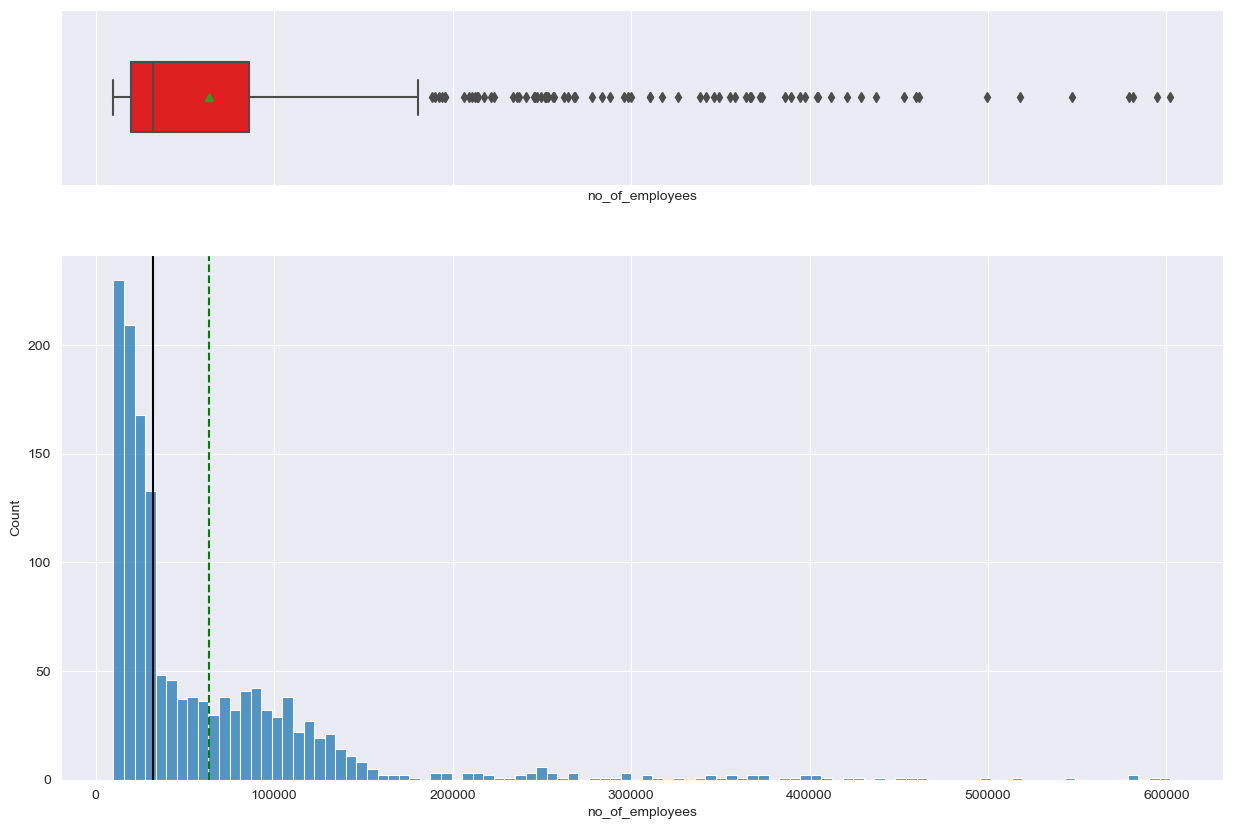

In [20]:
# check the number of employees greater than 10000

data_emp_without_zero = data.loc[data['no_of_employees'] > 10000]

histogram_boxplot(data_emp_without_zero, 'no_of_employees', bins=100)

* The distribution of the number of employees is heavily right-skewed.
* Some companies have more than 500k employees. Such companies might have multiple offices around the world./

#### observations on prevailing wage

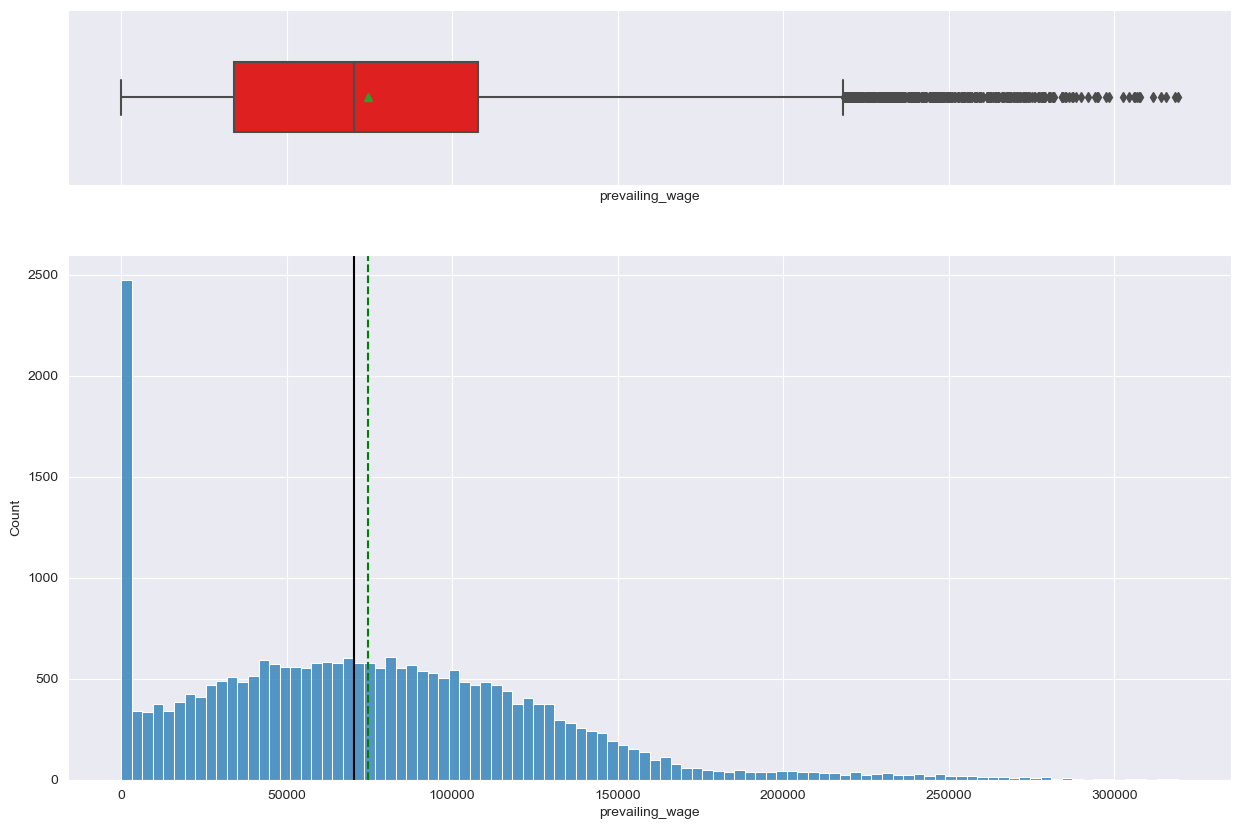

In [21]:
histogram_boxplot(data, 'prevailing_wage', bins=100)

* The distribution of prevailing wage is skewed to the right.
* There are some job roles where the prevailing wage is more than 200k.
* The distribution suggests that some applicants have prevailing wage around 0, let's have a look at them. As we say in the data summary the minimum value is 2.13.

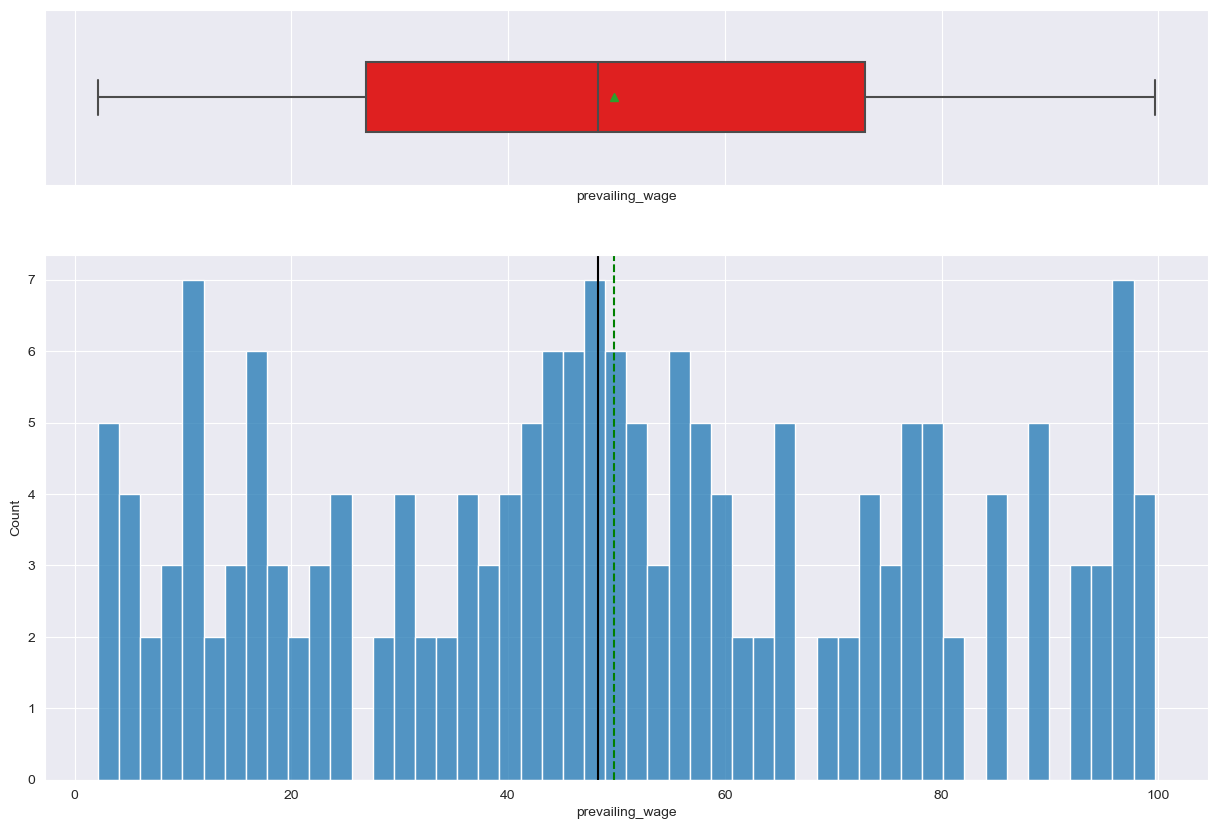

In [22]:
# checking the applicants with prevailing wage less than 100
data.loc[data['prevailing_wage'] < 100]

histogram_boxplot(data.loc[data['prevailing_wage'] < 100], 'prevailing_wage')

* It looks like the unit of the wage for these observations is hours. 

In [23]:
data.loc[data['prevailing_wage'] < 100, 'unit_of_wage'].value_counts()

unit_of_wage
Hour    176
Name: count, dtype: int64

* All such observations where the prevailing wage is less than 100 have the unit of wage as hours. This makes sense and confirms that these are not anomalous observations in the data.

In [24]:
# function to create labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top
    
    data : dataframe
    feature : dataframe column
    perc : True for percentage, False for count
    n : how many categories to show
    """

    total = len(data[feature])
    count = data[feature].nunique()

    if n is None:
        plt.figure(figsize=(count + 2, 6), dpi=100)
    else:
        plt.figure(figsize=(n + 2, 6), dpi=100)

    ax = sns.countplot(data=data, x=feature,
                       palette='Paired',
                       order=data[feature].value_counts().index[:n]
                       )

    for p in ax.patches:
        if perc == True:
            lable = f"{p.get_height() / total * 100:.2f}%\n"
        else:
            lable = p.get_height()

        x = p.get_x() + p.get_width() / 2
        y = p.get_height()

        ax.annotate(lable, (x, y), ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                    textcoords='offset points')

    plt.xlabel(feature, fontsize=14, weight='bold')
    plt.ylabel('Count', fontsize=14, weight='bold')

    plt.show()

#### observations on continent of citizenship

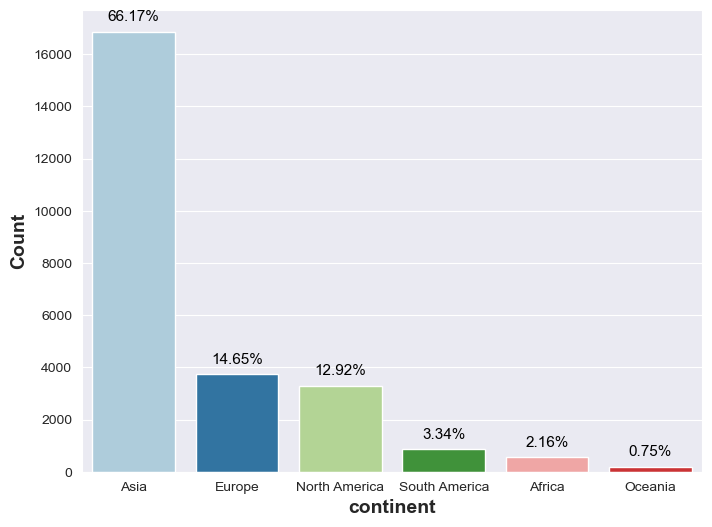

In [25]:
labeled_barplot(data, 'continent', perc=True)

* Most of the applicants are from Asia followed by Europe.
* More than 90% of the applicants are from Asia, Europe, and North America.

#### observations on education

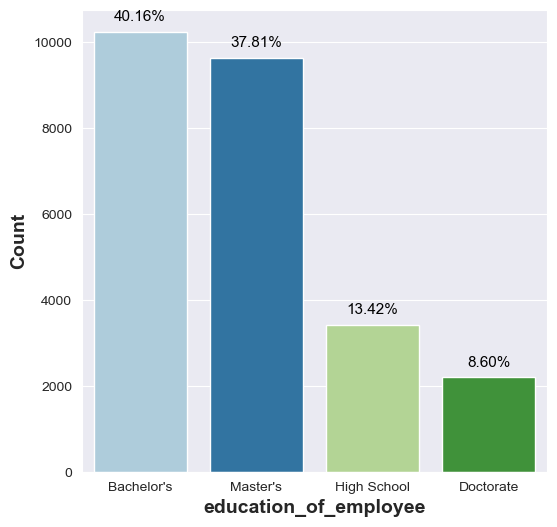

In [26]:
labeled_barplot(data, 'education_of_employee', perc=True)

* 40.2% of the applicants have a bachelor's degree, followed by 37.8% having a master's degree.
* 8.6% of the applicants have a doctorate degree.

#### observations on job experience

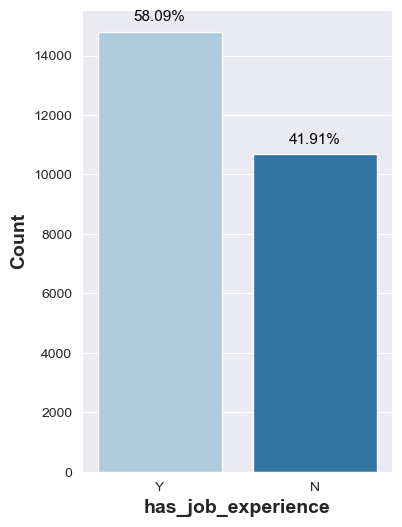

In [27]:
labeled_barplot(data, 'has_job_experience', perc=True)

* 58% of the applicants have job experience.

#### observations on job training

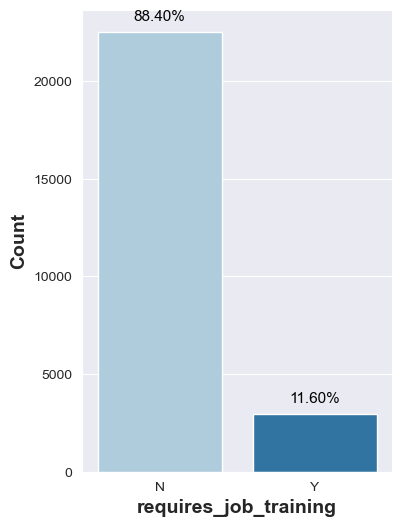

In [28]:
labeled_barplot(data, 'requires_job_training', perc=True)

* 88% of the applicants do not require job training.

#### observations on region of employment

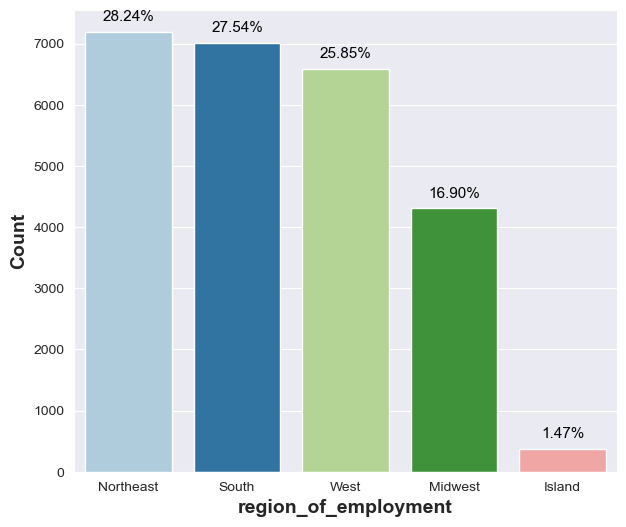

In [29]:
labeled_barplot(data, 'region_of_employment', perc=True)

* 28.2% of the applicants have their worksite in the Northeast region of the US.
* 27.5% of the applicants have their worksite in the South region of the US.
* 25.8% of the applicants have their worksite in the West region of the US.
* Least number of applicants have their worksite in the Island.

#### observations on unit of wage

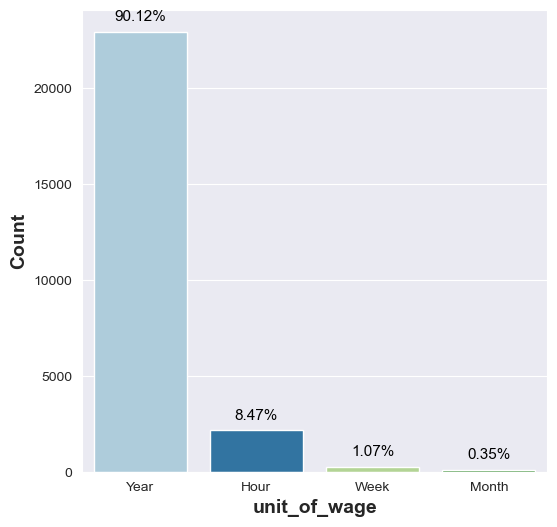

In [30]:
labeled_barplot(data, 'unit_of_wage', perc=True)

* 90.1% of the applicants have a yearly unit of the wage, followed by 8.5% of the applicants having hourly wages.

#### observations on case status

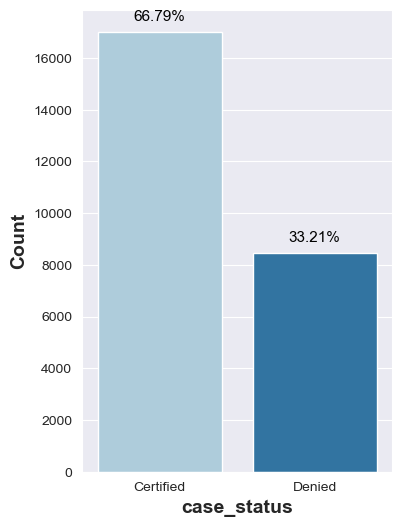

In [31]:
labeled_barplot(data, 'case_status', perc=True)

* 66.8% of the visas were certified.

### Bivariate Analysis

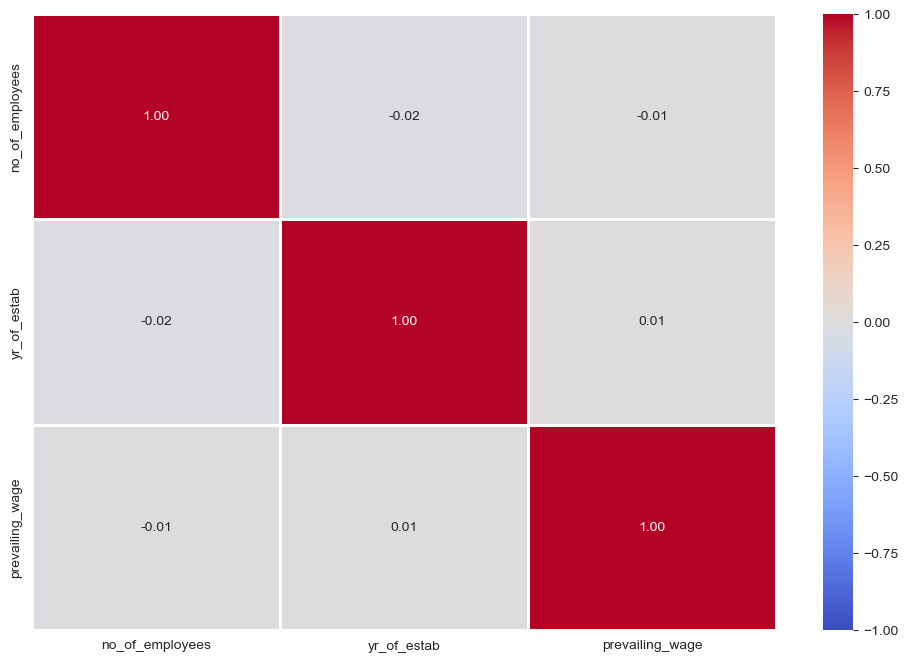

In [32]:
cols_list = data.select_dtypes(include=np.number).columns

plt.figure(figsize=(12, 8), dpi=100)

sns.heatmap(
    data[cols_list].corr(),
    annot=True,
    fmt='.2f',
    linewidths=2,
    cmap='coolwarm',
    vmin=-1,
    vmax=1
)

plt.show()

* There's no correlation within the independent features of the data.

#### create functions for plotting categorical variables with respect to the target variable

In [33]:
### function to plot distributions wrt target variable

def distribution_plot_wrt_traget(data, predictor, target):
    """
    plot distribution of predictor wrt target
    
    data : dataframe
    predictor : dataframe column
    target : dataframe column
    """

    fig, axs = plt.subplots(2, 2, figsize=(15, 10), dpi=100)

    target_uniq = data[target].unique()

    axs[0, 0].set_title('Distribution of target for target=' + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color='teal',
        stat='density'
    )

    axs[0, 1].set_title('Distribution of target for target=' + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color='orange',
        stat='density'
    )

    axs[1, 0].set_title('Boxplot of target for target=' + str(target_uniq[0]))

    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 0],
        palette='gist_rainbow'
    )

    axs[1, 1].set_title('Boxplot of target (without outilers) for target=' + str(target_uniq[1]))

    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette='gist_rainbow'
    )

    plt.tight_layout()
    plt.show()



In [34]:
def stacked_barplot(data, predictor, target):
    """
    print the category counts and plot stacked barplot

    data : dataframe
    predictor : dataframe column
    target : dataframe column
    """

    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]

    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )

    print(tab1)
    print('----------------------DIVIDED-------------------------')

    tab = pd.crosstab(data[predictor], data[target], normalize='index').sort_values(
        by=sorter,
        ascending=False
    )

    fig, ax = plt.subplots(figsize=(count + 5, 5), dpi=100)
    tab.plot(kind='bar', stacked=True, ax=ax)

    plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1), frameon=1)

    plt.xlabel(predictor, fontsize=14, weight='bold')
    plt.ylabel('Percentage', fontsize=14, weight='bold')
    plt.xticks(rotation=0)

    plt.show()

#### Those with higher education may want to travel abroad for a well-paid job. Let's find out if education has any impact on visa certification

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
----------------------DIVIDED-------------------------


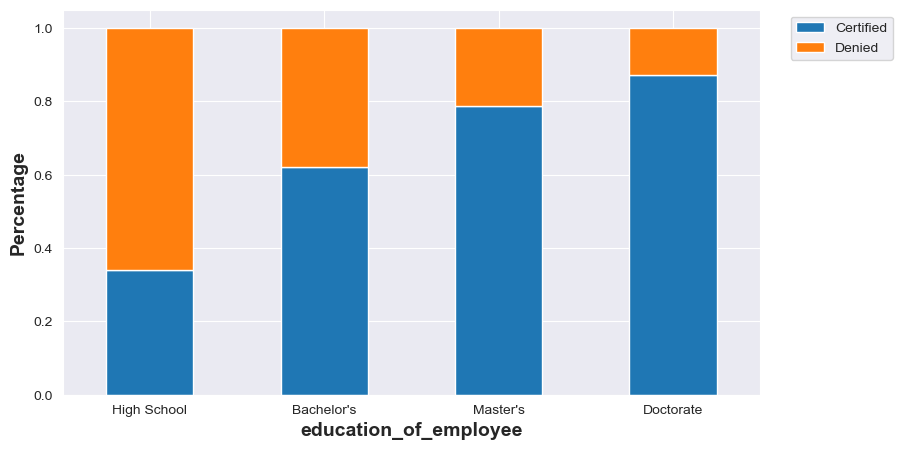

In [35]:
stacked_barplot(data, 'education_of_employee', 'case_status')

* Education seems to have a positive relationship with the certification of visa that is higher the education higher are the chances of visa getting certified.
* Around 85% of the visa applications got certified for the applicants with Doctorate degree. While 80% of the visa applications got certified for the applicants with Master's degree.
* Around 60% of the visa applications got certified for applicants with Bachelor's degrees.
* Applicants who do not have a degree and have graduated from high school are more likely to have their applications denied.

#### Different regions have different requirements of talent having diverse educational backgrounds. Let's analyze it further

In [36]:
pd.crosstab(data['education_of_employee'], data['region_of_employment'], normalize='index')

region_of_employment,Island,Midwest,Northeast,South,West
education_of_employee,,,,,
Bachelor's,0.012605,0.128493,0.280829,0.292261,0.285812
Doctorate,0.011405,0.116788,0.299270,0.246807,0.325730
High School,0.017544,0.215205,0.264620,0.273099,0.229532
Master's,0.016712,0.207598,0.286485,0.264791,0.224414


In [37]:
pd.pivot_table(
    data=data,
    index='education_of_employee',
    columns='region_of_employment',
    values='case_status',
    aggfunc='count'
)

region_of_employment,Island,Midwest,Northeast,South,West
education_of_employee,,,,,
Bachelor's,129,1315,2874,2991,2925
Doctorate,25,256,656,541,714
High School,60,736,905,934,785
Master's,161,2000,2760,2551,2162


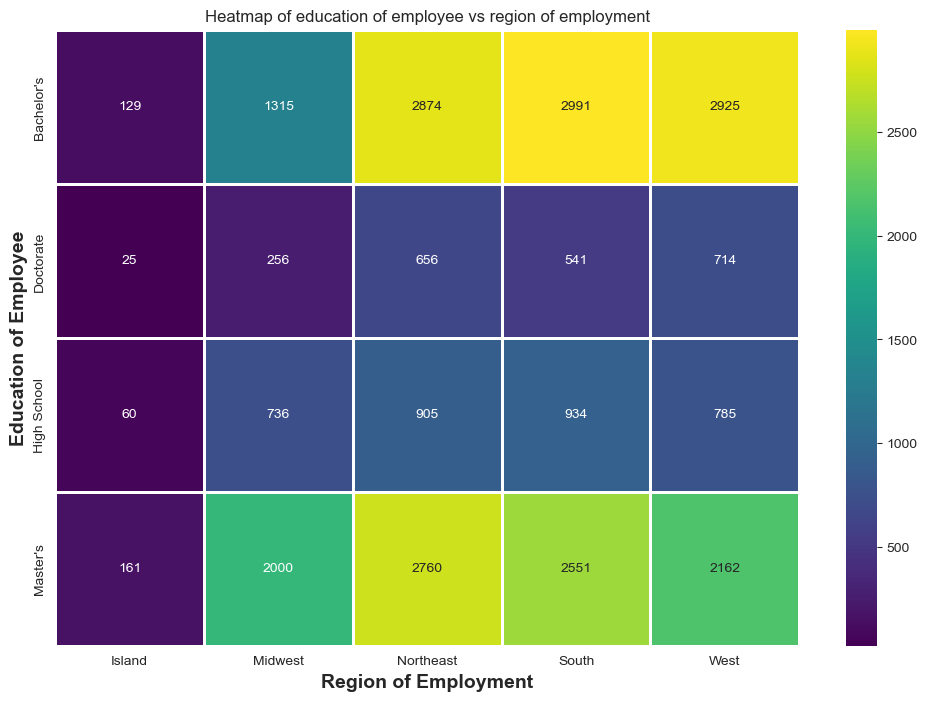

In [38]:
plt.figure(figsize=(12, 8), dpi=100)

sns.heatmap(
    pd.crosstab(data['education_of_employee'], data['region_of_employment']),
    annot=True,
    fmt='g',
    linewidths=2,
    cmap='viridis'
)

plt.xlabel('Region of Employment', fontsize=14, weight='bold')
plt.ylabel('Education of Employee', fontsize=14, weight='bold')

plt.title('Heatmap of education of employee vs region of employment')
plt.show()

* The requirement for the applicants who have passed high school is most in the South region, followed by Northeast region.
* The requirement for Bachelor's is mostly in South region, followed by West region.
* The requirement for Master's is most in Northeast region, followed by South region.
* The requirement for Doctorate's is mostly in West region, followed by Northeast region.

#### Let's have a look at the percentage of visa certifications across each region

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
----------------------DIVIDED-------------------------


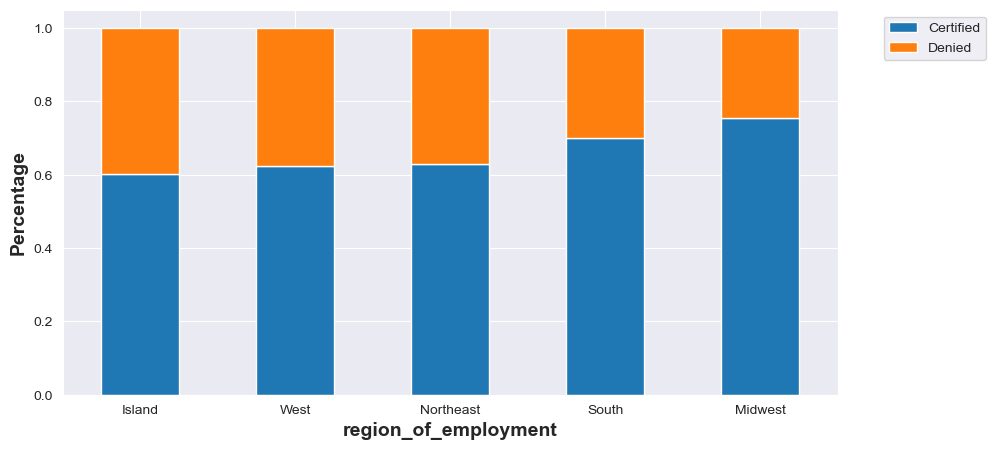

In [39]:
stacked_barplot(data, 'region_of_employment', 'case_status')

* Midwest region sees the highest number of visa certifications - around 75%, followed by the south region that sees around 70% of the visa applications getting certified.
* Island, West, and Northeast region has an almost equal percentage of visa certifications.
* The South region has the highest number of visa applications getting denied.

#### Lets' similarly check for the continents and find out how the visa status vary across different continents.

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
----------------------DIVIDED-------------------------


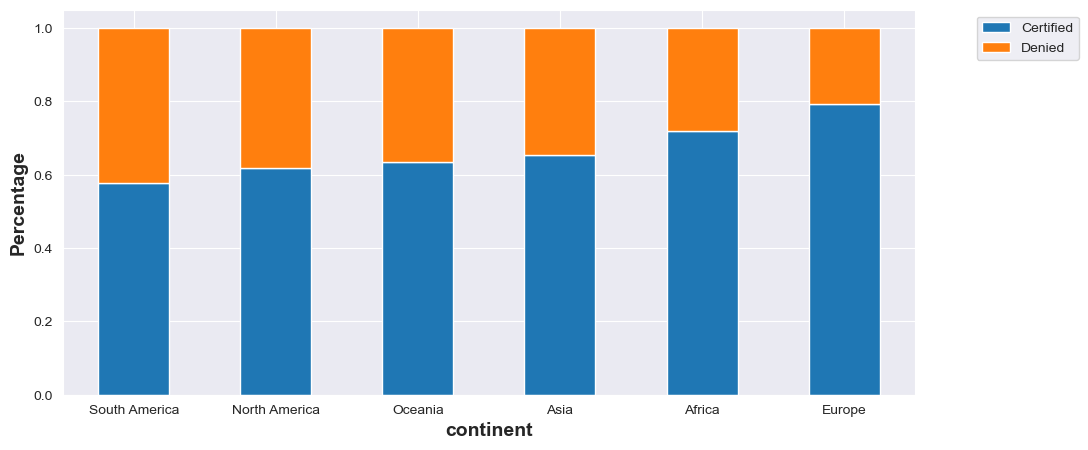

In [40]:
stacked_barplot(data, 'continent', 'case_status')

* Applications from Europe and Africa have a higher chance of getting certified.
* Around 80% of the applications from Europe are certified.
* Asia has the third-highest percentage (Around 60%) of visa certification and has the highest number of applications.

#### Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Let's see if having work experience has any influence over visa certification

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
----------------------DIVIDED-------------------------


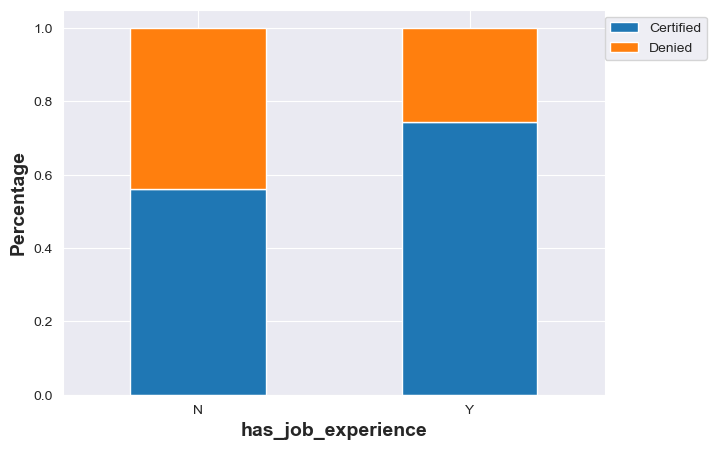

In [41]:
stacked_barplot(data, 'has_job_experience', 'case_status')

* Having job experience seems to be a key differentiator between visa applications getting certified or denied.
* Around 80% of the applications were certified for the applicants who have some job experience as compared to the applicants who do not have any job experience. 
* Applicants without job experiences saw only 60% of the visa applications getting certified.

#### Do the employees who have prior work experience require any job training?

requires_job_training      N     Y    All
has_job_experience                       
All                    22525  2955  25480
N                       8988  1690  10678
Y                      13537  1265  14802
----------------------DIVIDED-------------------------


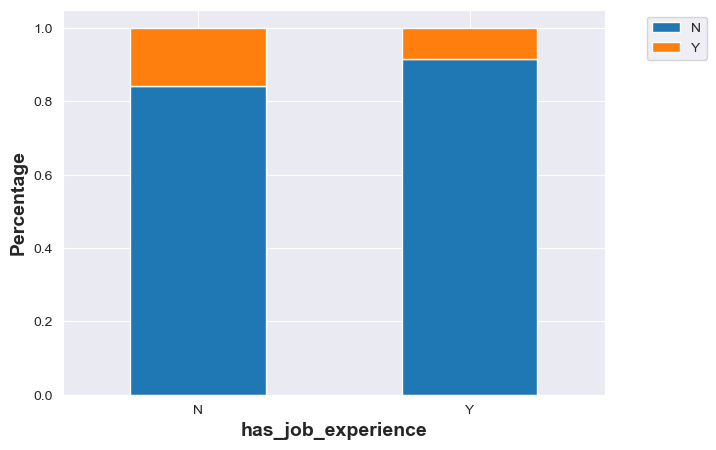

In [42]:
stacked_barplot(data, 'has_job_experience', 'requires_job_training')

* Less percentage of applicants require job training if they have prior work experience.

#### The US government has established a prevailing wage to protect local talent and foreign workers. Let's analyze the data and see if the visa status changes with the prevailing wage

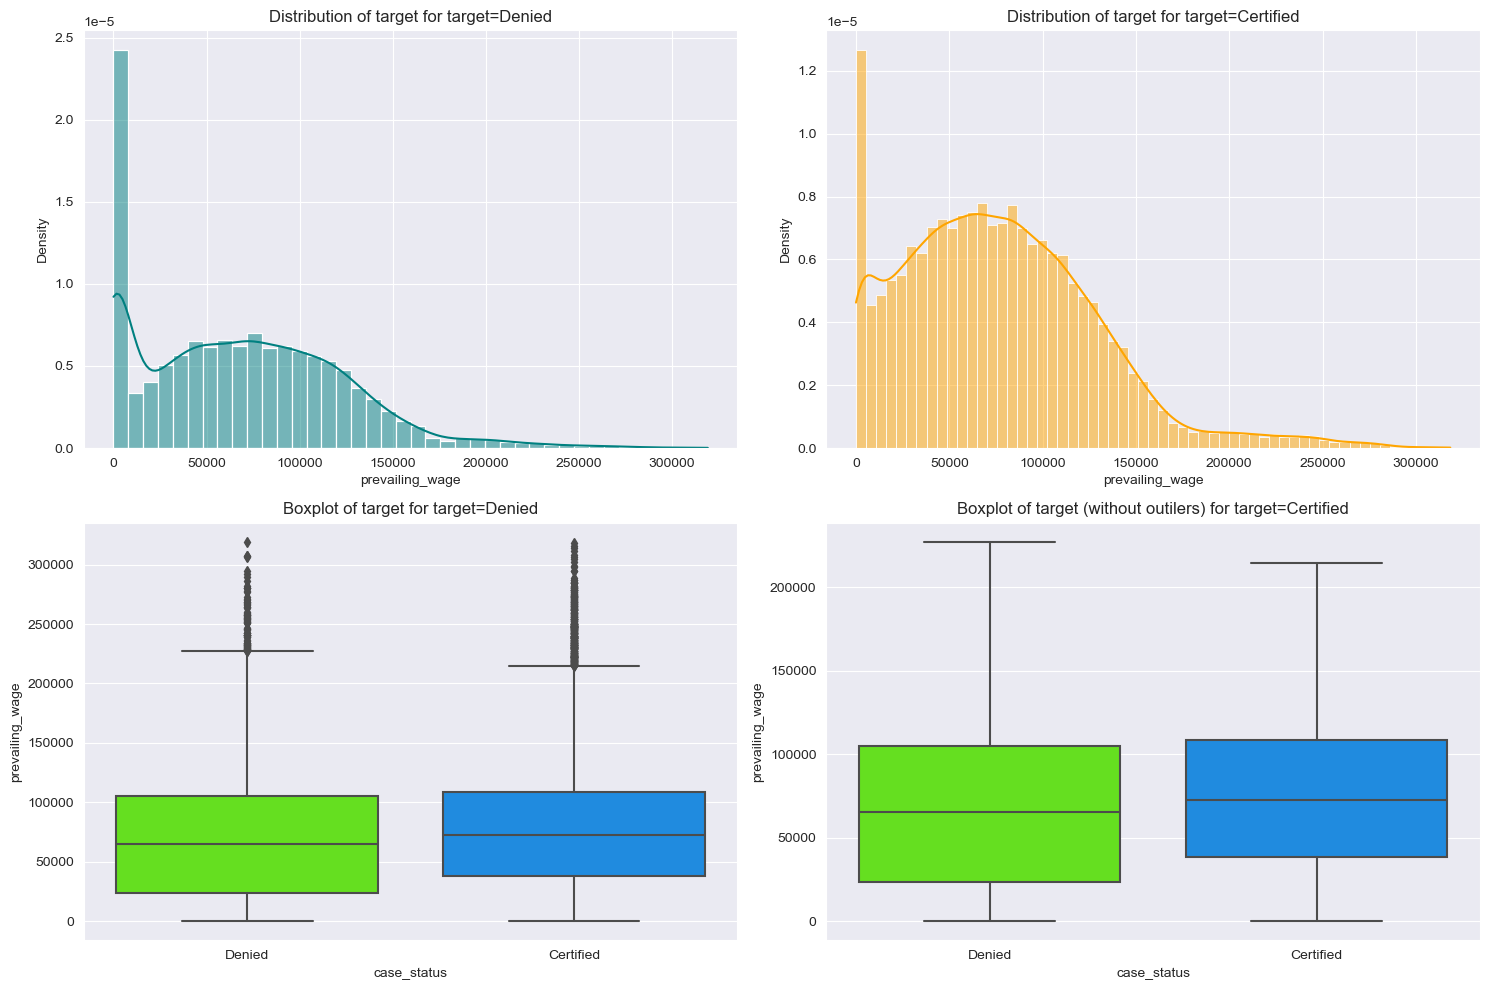

In [43]:
distribution_plot_wrt_traget(data, 'prevailing_wage', 'case_status')

* The median prevailing wage for the certified applications is slightly higher as compared to denied applications.

#### Checking if the prevailing wage is similar across all the regions of the US

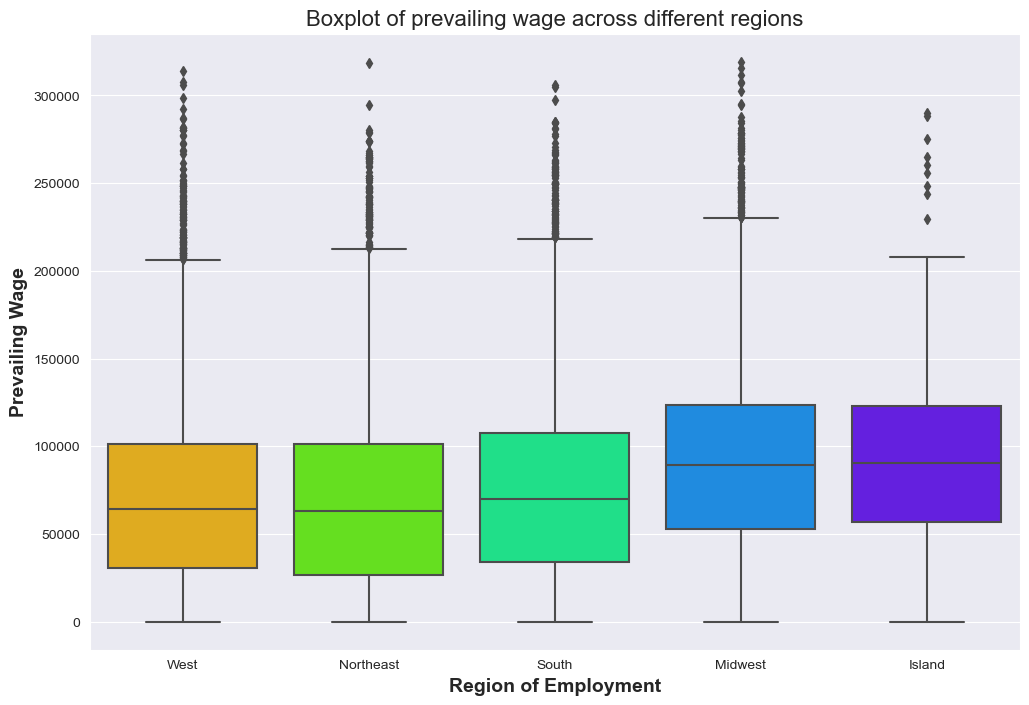

In [44]:
plt.figure(figsize=(12, 8), dpi=100)

sns.boxplot(
    data=data,
    x='region_of_employment',
    y='prevailing_wage',
    palette='gist_rainbow'
)

plt.xlabel('Region of Employment', fontsize=14, weight='bold')
plt.ylabel('Prevailing Wage', fontsize=14, weight='bold')
plt.title('Boxplot of prevailing wage across different regions', fontsize=16)

plt.show()

* Midwest and Island regions have slightly higher prevailing wages as compared to other regions. 
* The distribution of prevailing wage is similar across West, Northeast, and South regions.

#### The prevailing wage has different units (Hourly, Weekly, etc). 
#### Let's find out if it has any impact on visa applications getting certified.

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
----------------------DIVIDED-------------------------


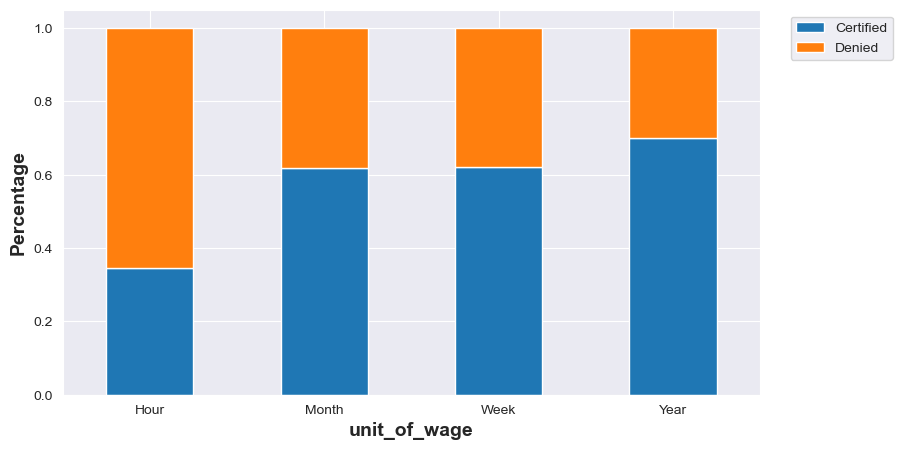

In [45]:
stacked_barplot(data, 'unit_of_wage', 'case_status')

* Unit of prevailing wage is an important factor for differentiating between a certified and a denied visa application.
* If the unit of prevailing wage is Yearly, there's a high chance of the application getting certified.
* Around 75% of the applications were certified for the applicants who have a yearly unit of wage. While only 35% of the applications were certified for applicants who have an hourly unit of wage.
* Monthly and Weekly units of prevailing wage have the same percentage of visa applications getting certified.

## Data Pre-processing

### Outlier Check

- Let's check for outliers in the data.

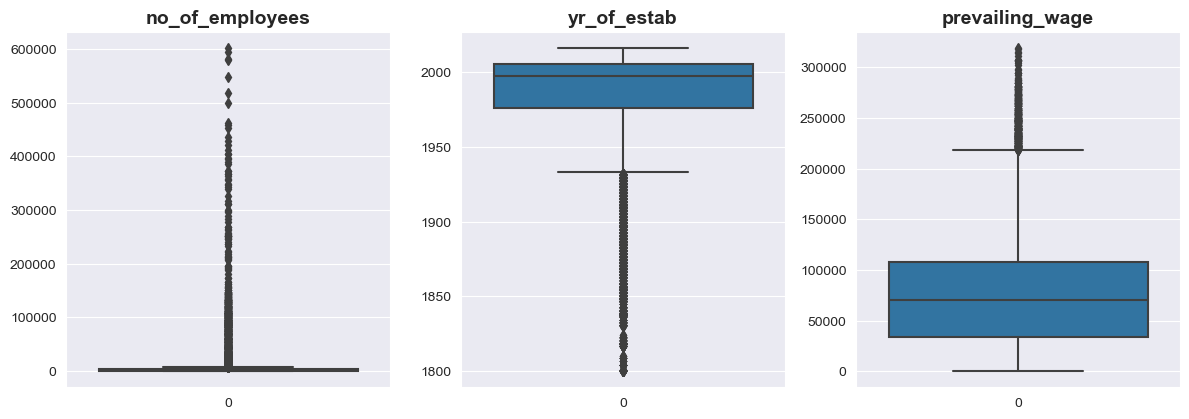

In [46]:
# outiler detection function

numeric_cols = data.select_dtypes(include=np.number).columns

plt.figure(figsize=(12, 8), dpi=100)

for i in range(len(numeric_cols)):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(data[numeric_cols[i]], whis=1.5)
    plt.tight_layout()
    plt.title(numeric_cols[i], fontsize=14, weight='bold')

plt.show()


**Observations**

- There are quite a few outliers in the data.
- However, we will not treat them as they are proper values.

### Data Preparation for modeling

- We want to predict which visa will be certified.
- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [47]:
from sklearn.preprocessing import LabelEncoder

data['case_status'] = data['case_status'].apply(lambda x: 1 if x == 'Certified' else 0)

X = data.drop(['case_status'], axis=1)
Y = data['case_status']

In [48]:
X = pd.get_dummies(X, drop_first=True)

In [49]:
# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [50]:
print('The shape of the train data is:', X_train.shape)
print('The shape of the test data is:', X_test.shape)

The shape of the train data is: (17836, 21)
The shape of the test data is: (7644, 21)


## Model evaluation criterion

**Model can make wrong predictions as**:

1. Model predicts that the visa application will get certified but in reality, the visa application should get denied.
2. Model predicts that the visa application will not get certified but in reality, the visa application should get certified. 

**Which case is more important?** 
* Both the cases are important as:

* If a visa is certified when it had to be denied a wrong employee will get the job position while US citizens will miss the opportunity to work on that position.

* If a visa is denied when it had to be certified the U.S. will lose a suitable human resource that can contribute to the economy. 


**How to reduce the losses?**

* `F1 Score` can be used a the metric for evaluation of the model, greater the F1  score higher are the chances of minimizing False Negatives and False Positives. 
* We will use balanced class weights so that model focuses equally on both classes.

First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_sklearn function will be used to check the model performance of models. 
* The confusion_matrix_sklearn function will be used to plot the confusion matrix.

In [51]:
def model_performance_classification_sklearn(model, predictors, target):
    """
    print the model performance metrics
    
    model : model object
    predictors : dataframe columns
    target : dataframe column
    """

    f1 = f1_score(target, model.predict(predictors))
    acc = accuracy_score(target, model.predict(predictors))
    auc = roc_auc_score(target, model.predict_proba(predictors)[:, 1])
    recall = recall_score(target, model.predict(predictors))
    precision = precision_score(target, model.predict(predictors))

    df = pd.DataFrame(
        {
            'F1 Score': [f1],
            'AUC': [auc],
            'Recall': [recall],
            'Precision': [precision],
            'Accuracy': [acc]
        }
    )

    return df


In [52]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Model Building

## Decision Tree - Model Building and Hyperparameter Tuning

In [53]:
model = DecisionTreeClassifier(random_state=1)

model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

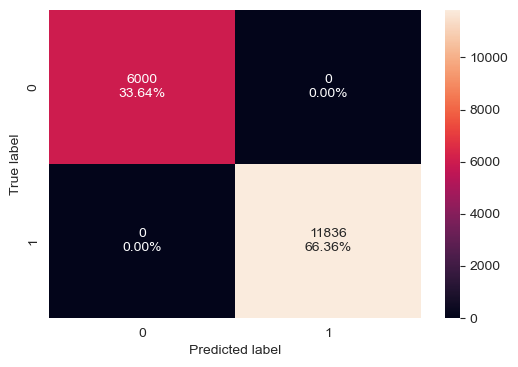

In [54]:
confusion_matrix_sklearn(model, X_train, y_train)

In [55]:
decision_tree_train_perf = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_train_perf

,F1 Score,AUC,Recall,Precision,Accuracy
0,1.0,1.0,1.0,1.0,1.0


* 0 errors on the training set, each sample has been classified correctly.
* Model has performed very well on the training set.
* As we know, a decision tree will continue to grow and classify each data point correctly if no restrictions are applied as the trees will learn all the patterns in the training set.
* Let's check the performance on test data to see if the model is overfitting.

In [56]:
decision_tree_test_perf = model_performance_classification_sklearn(
    model, X_test, y_test
)

decision_tree_test_perf

,F1 Score,AUC,Recall,Precision,Accuracy
0,0.749659,0.620996,0.741992,0.757486,0.66405


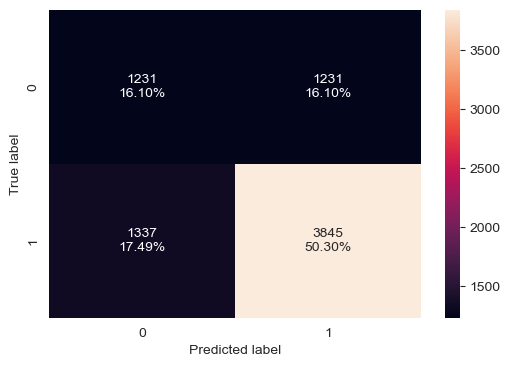

In [57]:
confusion_matrix_sklearn(model, X_test, y_test)

* The decision tree model is overfitting the data as expected and not able to generalize well on the test set.
* We will have to prune the decision tree.

### Hyperparameter Tuning - Decision Tree

In [58]:
from sklearn import metrics

# Choose the type of classifier.
dtree_estimator = DecisionTreeClassifier(class_weight="balanced", random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(10, 30, 5),
    "min_samples_leaf": [3, 5, 7],
    "max_leaf_nodes": [2, 3, 5],
    "min_impurity_decrease": [0.0001, 0.001],
}
# parameters = {
#     'max_depth': [2, 4, 6],
#     'max_leaf_nodes': [50, 75, 150, 250],
#     'min_samples_split': [10, 30, 50, 70],
# }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer, n_jobs=-1)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=10, max_leaf_nodes=2,
                       min_impurity_decrease=0.0001, min_samples_leaf=3,
                       random_state=1)

Model Performance on Train Data

In [59]:
dtree_estimator_model_train_perf = model_performance_classification_sklearn(dtree_estimator, X_train, y_train)
dtree_estimator_model_train_perf

,F1 Score,AUC,Recall,Precision,Accuracy
0,0.808949,0.599117,0.931734,0.714758,0.70795


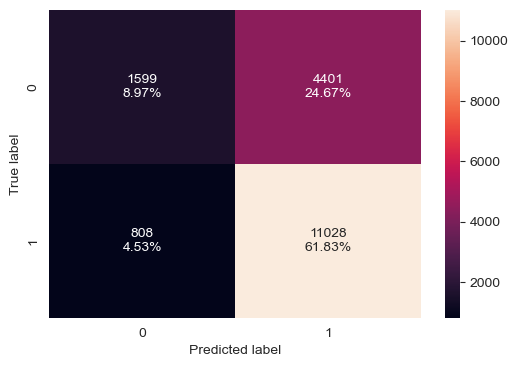

In [60]:
confusion_matrix_sklearn(dtree_estimator, X_train, y_train)

### Model Performance on Test Data

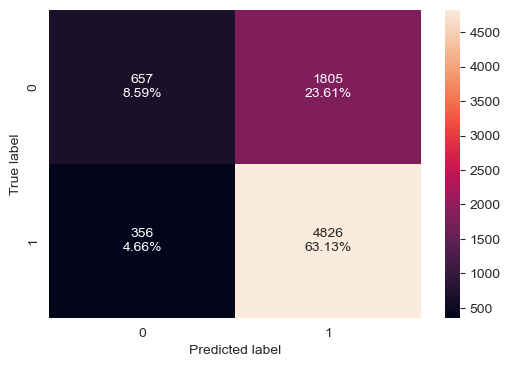

In [61]:
confusion_matrix_sklearn(dtree_estimator, X_test, y_test)

In [62]:
dtree_estimator_model_test_perf = model_performance_classification_sklearn(dtree_estimator, X_test, y_test)
dtree_estimator_model_test_perf

,F1 Score,AUC,Recall,Precision,Accuracy
0,0.817066,0.599078,0.931301,0.727794,0.717295


* The decision tree model has a very high recall but, the precision is quite less.
* The performance of the model after hyperparameter tuning has become generalized.
* We are getting an F1 score of 0.81 and 0.80 on the training and test set, respectively.
* Let's try building some ensemble models and see if the metrics improve.

## Bagging - Model Building and Hyperparameter Tuning

### Bagging Classifier

In [63]:
from sklearn.ensemble import BaggingClassifier

bagging_model = BaggingClassifier(random_state=1)
bagging_model.fit(X_train, y_train)

BaggingClassifier(random_state=1)

#### Model Performance on Train Data

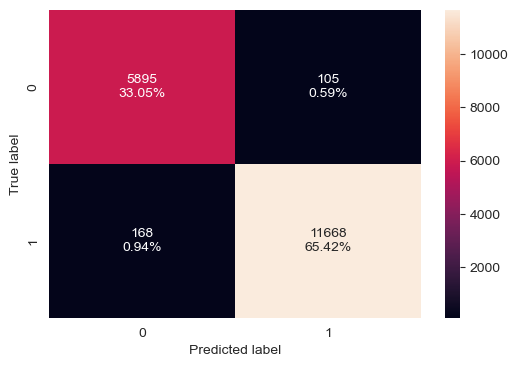

In [64]:
confusion_matrix_sklearn(bagging_model, X_train, y_train)

In [65]:
bagging_model_train_perf = model_performance_classification_sklearn(bagging_model, X_train, y_train)
bagging_model_train_perf

,F1 Score,AUC,Recall,Precision,Accuracy
0,0.988437,0.99868,0.985806,0.991081,0.984694


#### Model Performance on Test Data

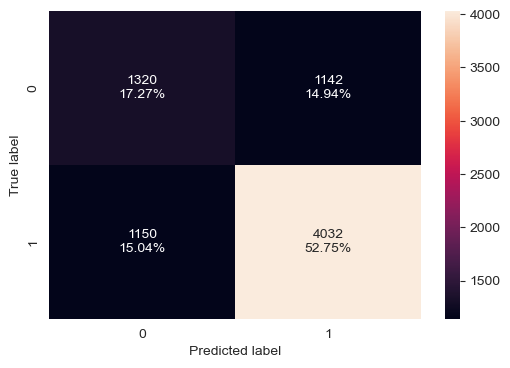

In [66]:
confusion_matrix_sklearn(bagging_model, X_test, y_test)

In [67]:
bagging_model_test_perf = model_performance_classification_sklearn(bagging_model, X_test, y_test)
bagging_model_test_perf

,F1 Score,AUC,Recall,Precision,Accuracy
0,0.778679,0.728315,0.778078,0.779281,0.700157


* The bagging classifier is overfitting on the training set like the decision tree model.
* We'll try to reduce overfitting and improve the performance by hyperparameter tuning.

### Hyperparameter Tuning - Bagging Classifier

In [68]:
bagging_estimator_tuned = BaggingClassifier(random_state=1)

parameters = {
    "max_samples": [0.7, 0.8, 0.9],
    "max_features": [0.7, 0.8, 0.9],
    "n_estimators": np.arange(90, 120, 10),
}

scorer = metrics.make_scorer(metrics.f1_score)

grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=scorer, n_jobs=-1)

grid_obj = grid_obj.fit(X_train, y_train)

bagging_estimator_tuned = grid_obj.best_estimator_

bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=0.7, n_estimators=110,
                  random_state=1)

#### Model Performance on Train Data

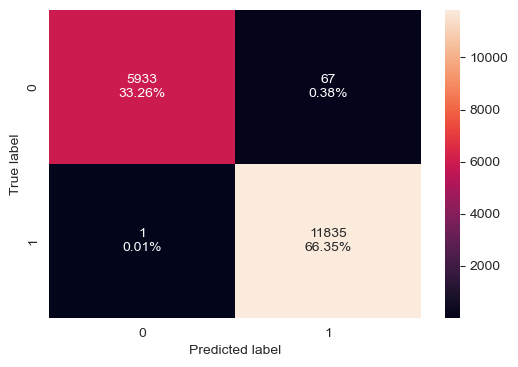

In [69]:
confusion_matrix_sklearn(bagging_estimator_tuned, X_train, y_train)

In [70]:
bagging_model_tuned_train_perf = model_performance_classification_sklearn(bagging_estimator_tuned, X_train, y_train)
bagging_model_tuned_train_perf

,F1 Score,AUC,Recall,Precision,Accuracy
0,0.997135,0.999993,0.999916,0.994371,0.996187


#### Model Performance on Test Data

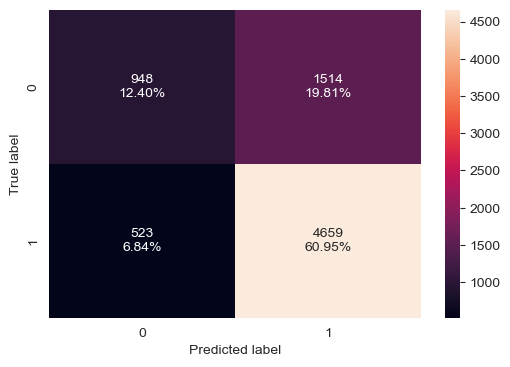

In [71]:
confusion_matrix_sklearn(bagging_estimator_tuned, X_test, y_test)

In [72]:
bagging_model_tuned_test_perf = model_performance_classification_sklearn(bagging_estimator_tuned, X_test, y_test)
bagging_model_tuned_test_perf

,F1 Score,AUC,Recall,Precision,Accuracy
0,0.820608,0.758315,0.899074,0.754738,0.733516


* After tuning the hyperparameters the bagging classifier is still overfitting.
* There's a big difference in the training and the test recall.

### Random Forest Classifier

In [73]:
rf_model = RandomForestClassifier(random_state=1)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

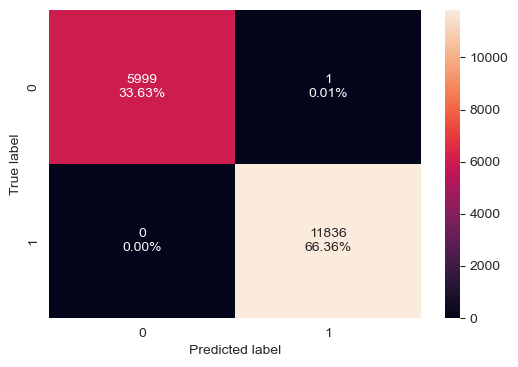

In [74]:
confusion_matrix_sklearn(rf_model, X_train, y_train)

In [75]:
rf_model_train_perf = model_performance_classification_sklearn(rf_model, X_train, y_train)
rf_model_train_perf

,F1 Score,AUC,Recall,Precision,Accuracy
0,0.999958,1.0,1.0,0.999916,0.999944


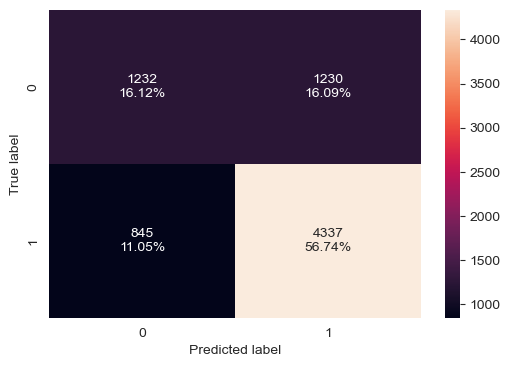

In [76]:
confusion_matrix_sklearn(rf_model, X_test, y_test)

In [77]:
rf_model_test_perf = model_performance_classification_sklearn(rf_model, X_test, y_test)

In [78]:
rf_model_test_perf

,F1 Score,AUC,Recall,Precision,Accuracy
0,0.806959,0.756098,0.836936,0.779055,0.728545


- With default parameters, random forest is overfitting the training data.
- We'll try to reduce overfitting and improve recall by hyperparameter tuning.

### Hyperparameter Tuning - Random Forest

In [79]:
rf_model_tuned = RandomForestClassifier(random_state=1)

parameters = {
    "max_depth": list(np.arange(5, 15, 5)),
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [3, 5, 7],
    "n_estimators": np.arange(10, 40, 10),
}

scorer = metrics.make_scorer(metrics.f1_score)

grid_obj = GridSearchCV(rf_model_tuned, parameters, scoring=scorer, n_jobs=-1)

grid_obj = grid_obj.fit(X_train, y_train)

rf_model_tuned = grid_obj.best_estimator_

rf_model_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=30,
                       random_state=1)

#### Model Performance on Train Data

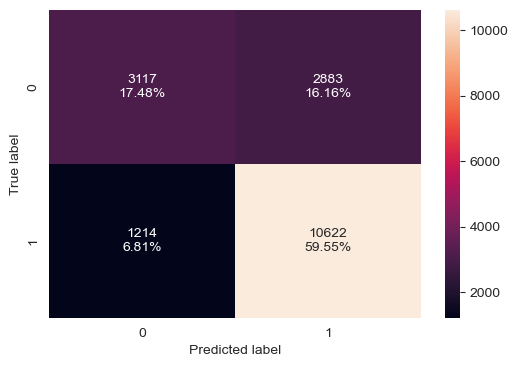

In [80]:
confusion_matrix_sklearn(rf_model_tuned, X_train, y_train)

In [81]:
rf_model_tuned_train_perf = model_performance_classification_sklearn(rf_model_tuned, X_train, y_train)
rf_model_tuned_train_perf

,F1 Score,AUC,Recall,Precision,Accuracy
0,0.838325,0.833606,0.897432,0.786524,0.770296


#### Model Performance on Test Data

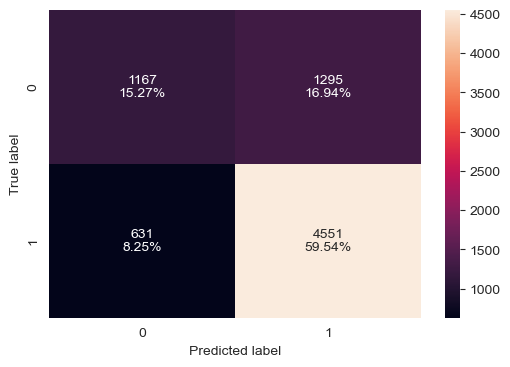

In [82]:
confusion_matrix_sklearn(rf_model_tuned, X_test, y_test)

In [83]:
rf_model_tuned_test_perf = model_performance_classification_sklearn(rf_model_tuned, X_test, y_test)
rf_model_tuned_test_perf

,F1 Score,AUC,Recall,Precision,Accuracy
0,0.825354,0.777904,0.878232,0.778481,0.748038


* After hyperparameter tuning the model performance has generalized.
* We have an F1 score of 0.84 and 0.82 on the training and test data, respectively.
* The model has a high recall and a good precision.

## Boosting - Model Building and Hyperparameter Tuning

### AdaBoost Classifier

In [84]:
ab_boost_model = AdaBoostClassifier(random_state=1)
ab_boost_model.fit(X_train, y_train)

AdaBoostClassifier(random_state=1)

#### Model Performance on Train Data

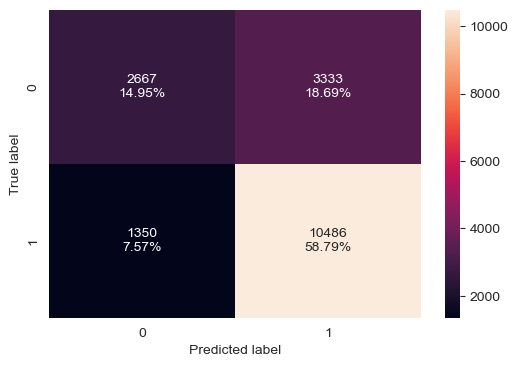

In [85]:
confusion_matrix_sklearn(ab_boost_model, X_train, y_train)

In [86]:
ab_boost_model_train_perf = model_performance_classification_sklearn(ab_boost_model, X_train, y_train)
ab_boost_model_train_perf

,F1 Score,AUC,Recall,Precision,Accuracy
0,0.817462,0.775614,0.885941,0.75881,0.737441


#### Model Performance on Test Data

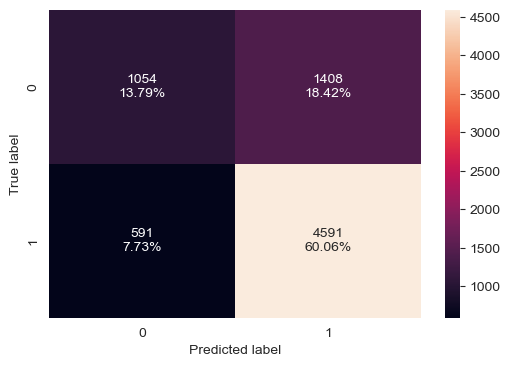

In [87]:
confusion_matrix_sklearn(ab_boost_model, X_test, y_test)

In [88]:
ab_boost_model_test_perf = model_performance_classification_sklearn(ab_boost_model, X_test, y_test)
ab_boost_model_test_perf

,F1 Score,AUC,Recall,Precision,Accuracy
0,0.821215,0.762962,0.885951,0.765294,0.738488


* The model is giving a generalized performance.
* We have received a good F1 score of 0.81 on both the training and test set.

### Hyperparameter Tuning - AdaBoost Classifier

In [89]:
# Choose the type of classifier.
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    # Let's try different max_depth for base_estimator
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, class_weight="balanced", random_state=1),
        DecisionTreeClassifier(max_depth=2, class_weight="balanced", random_state=1),
        DecisionTreeClassifier(max_depth=3, class_weight="balanced", random_state=1),
    ],
    "n_estimators": np.arange(60, 100, 10),
    "learning_rate": np.arange(0.1, 0.4, 0.1),
}

# Type of scoring used to compare parameter  combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         max_depth=1,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=90, random_state=1)

#### Model Performance on Train Data

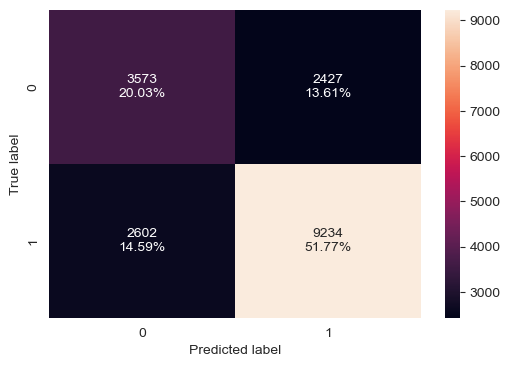

In [90]:
confusion_matrix_sklearn(abc_tuned, X_train, y_train)

In [91]:
abc_tuned_train_perf = model_performance_classification_sklearn(abc_tuned, X_train, y_train)
abc_tuned_train_perf

,F1 Score,AUC,Recall,Precision,Accuracy
0,0.785973,0.770745,0.780162,0.79187,0.718042


#### Model Performance on Test Data

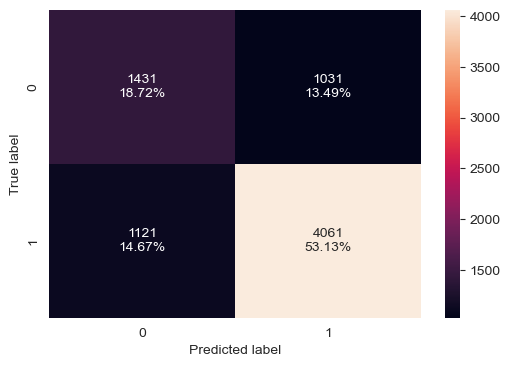

In [92]:
confusion_matrix_sklearn(abc_tuned, X_test, y_test)

In [93]:
abc_tuned_test_perf = model_performance_classification_sklearn(abc_tuned, X_test, y_test)
abc_tuned_test_perf

,F1 Score,AUC,Recall,Precision,Accuracy
0,0.790539,0.763651,0.783674,0.797526,0.718472


* After tuning the F1 score has reduced.
* The recall of the model has reduced but the precision has improved.

### Gradient Boosting Classifier

In [94]:
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train, y_train)

GradientBoostingClassifier(random_state=1)

#### Model Performance on Train Data

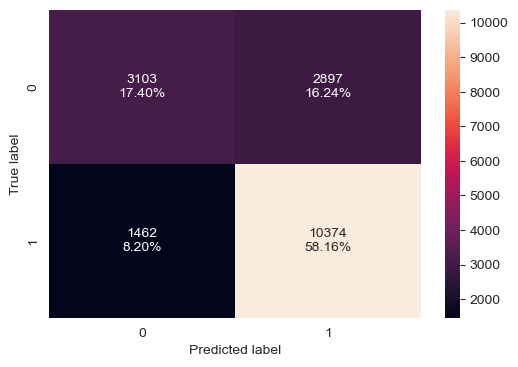

In [95]:
confusion_matrix_sklearn(gb_classifier, X_train, y_train)

In [96]:
gb_classifier_train_perf = model_performance_classification_sklearn(gb_classifier, X_train, y_train)
gb_classifier_train_perf

,F1 Score,AUC,Recall,Precision,Accuracy
0,0.826383,0.795787,0.876479,0.781704,0.755607


#### Model Performance on Test Data

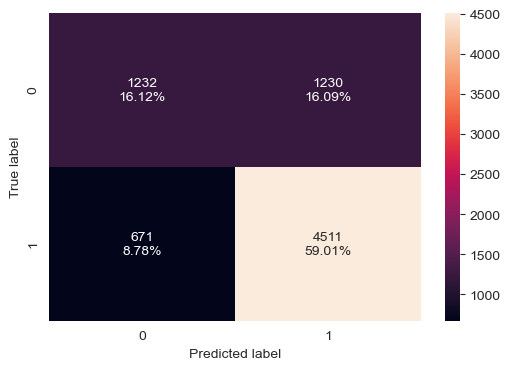

In [97]:
confusion_matrix_sklearn(gb_classifier, X_test, y_test)

In [98]:
gb_classifier_test_perf = model_performance_classification_sklearn(gb_classifier, X_test, y_test)
gb_classifier_test_perf

,F1 Score,AUC,Recall,Precision,Accuracy
0,0.825964,0.778026,0.870513,0.785752,0.751308


* The model is giving a good and generalized performance.
* We are getting the F1 score of 0.83 and 0.82 on the training and test set, respectively.
* Let's see if the performance can be improved further by hyperparameter tuning.

### Hyperparameter Tuning - Gradient Boosting Classifier

In [99]:
# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [200, 250, 300],
    "subsample": [0.8, 0.9, 1],
    "max_features": [0.7, 0.8, 0.9, 1],
    "learning_rate": np.arange(0.1, 0.4, 0.1),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

KeyboardInterrupt: 

#### Model Performance on Train Data

In [ ]:
confusion_matrix_sklearn(gbc_tuned, X_train, y_train)

In [ ]:
gbc_tuned_train_perf = model_performance_classification_sklearn(gbc_tuned, X_train, y_train)
gbc_tuned_train_perf

#### Model Performance on Test Data

In [ ]:
confusion_matrix_sklearn(gbc_tuned, X_test, y_test)

In [ ]:
gbc_tuned_test_perf = model_performance_classification_sklearn(gbc_tuned, X_test, y_test)
gbc_tuned_test_perf

* After tuning there is not much change in the model performance as compared to the model with default values of hyperparameters.

### XGBoost Classifier

In [ ]:
xgb_classifier = XGBClassifier(random_state=1, eval_metric="logloss")
xgb_classifier.fit(X_train, y_train)

#### Model Performance on Train Data

In [ ]:
confusion_matrix_sklearn(xgb_classifier, X_train, y_train)

In [ ]:
xgb_classifier_train_perf = model_performance_classification_sklearn(xgb_classifier, X_train, y_train)
xgb_classifier_train_perf

#### Model Performance on Test Data

In [ ]:
confusion_matrix_sklearn(xgb_classifier, X_test, y_test)

In [ ]:
xgb_classifier_test_perf = model_performance_classification_sklearn(xgb_classifier, X_test, y_test)
xgb_classifier_test_perf

* The XGBoost model on the training set has performed very well but it is not able to generalize on the test set.
* Let's try and tune the hyperparameters and see if the performance can be generalized.

In [ ]:
# Choose the type of classifier.
xgb_tuned = XGBClassifier(random_state=1, eval_metric="logloss")

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(150, 250, 50),
    "scale_pos_weight": [1, 2],
    "subsample": [0.9, 1],
    "learning_rate": np.arange(0.1, 0.21, 0.1),
    "gamma": [3, 5],
    "colsample_bytree": [0.8, 0.9],
    "colsample_bylevel": [0.9, 1],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

#### Model Performance on Train Data

In [ ]:
confusion_matrix_sklearn(xgb_tuned, X_train, y_train)

In [ ]:
xgb_tuned_train_perf = model_performance_classification_sklearn(xgb_tuned, X_train, y_train)
xgb_tuned_train_perf

#### Model Performance on Test Data

In [ ]:
confusion_matrix_sklearn(xgb_tuned, X_test, y_test)

In [ ]:
xgb_tuned_test_perf = model_performance_classification_sklearn(xgb_tuned, X_test, y_test)
xgb_tuned_test_perf

* XGBoost model after tuning is giving a good and generalized performance.
* We have received the F1 score of 0.83 and 0.82 on the training and the test set, respectively.

## Stacking Classifier

In [ ]:
from sklearn.ensemble import StackingClassifier

estimators = [
    ("AdaBoost", ab_boost_model),
    ("Gradient Boosting", gbc_tuned),
    ("Random Forest", rf_model_tuned),
]

final_estimator = xgb_tuned

stacking_classifier = StackingClassifier(
    estimators=estimators, final_estimator=final_estimator
)

stacking_classifier.fit(X_train, y_train)

#### Model Performance on Train Data

In [ ]:
confusion_matrix_sklearn(stacking_classifier, X_train, y_train)

In [ ]:
stacking_classifier_train_perf = model_performance_classification_sklearn(stacking_classifier, X_train, y_train)
stacking_classifier_train_perf

#### Model Performance on Test Data

In [ ]:
confusion_matrix_sklearn(stacking_classifier, X_test, y_test)

In [ ]:
stacking_classifier_test_perf = model_performance_classification_sklearn(stacking_classifier, X_test, y_test)
stacking_classifier_test_perf

* Stacking model has also given a good and generalized performance.
* The performance is comparable to the XGBoost model.
* We have received F1 scores of 0.83 and 0.81 on the training and test set, respectively.

## Model Comparison and Final Model Selection

**Comparing all models**

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_train_perf.T,
        dtree_estimator_model_train_perf.T,
        bagging_model_train_perf.T,
        bagging_model_tuned_train_perf.T,
        rf_model_train_perf.T,
        rf_model_tuned_train_perf.T,
        ab_boost_model_train_perf.T,
        abc_tuned_train_perf.T,
        gb_classifier_train_perf.T,
        gbc_tuned_train_perf.T,
        xgb_classifier_train_perf.T,
        xgb_tuned_train_perf.T,
        stacking_classifier_train_perf.T
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Training performance comparison:")
models_train_comp_df

In [ ]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_test_perf.T,
        dtree_estimator_model_test_perf.T,
        bagging_model_test_perf.T,
        bagging_model_tuned_test_perf.T,
        rf_model_test_perf.T,
        rf_model_tuned_test_perf.T,
        ab_boost_model_test_perf.T,
        abc_tuned_test_perf.T,
        gb_classifier_test_perf.T,
        gbc_tuned_test_perf.T,
        xgb_classifier_test_perf.T,
        xgb_tuned_test_perf.T,
        stacking_classifier_test_perf.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Testing performance comparison:")
models_test_comp_df

*  Tuned Random Forest model has given a good and generalized performance. We will use it as our final model.
* With the tuned random forest model we are getting the F1 score of 0.84 and 0.82 on the training and the test set, respectively.
* Let's check the important features of the final model.

### Important features of the final model

In [ ]:
feature_names = X_train.columns
importances = rf_model_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12), dpi=100)

plt.title("Feature Importances")

plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])

plt.xlabel("Relative Importance")
plt.show()

* Looking at the feature importance of the Random Forest model, the top three important features to look for while certifying a visa are -Education of the employee, Job experience, and Prevailing Wage.

## Actionable Insights and Recommendations

**The profile of the applicants for whom the visa status can be approved:**

**Primary information to look at:**
- `Education level` - At least has a Bachelor's degree - Master's and doctorate are preferred.
- `Job Experience` - Should have some job experience. 
- `Prevailing wage` - The median prevailing wage of the employees for whom the visa got certified is around 72k. 


**Secondary information to look at:**

- `Unit of Wage`    - Applicants having a yearly unit of wage. 
- `Continent`       - Ideally the nationality and ethnicity of an applicant shouldn't matter to work in a country but previously it has been observed that applicants from Europe, Africa, and Asia have higher chances of visa certification.
- `Region of employment` - Our analysis suggests that the applications to work in the Mid-West region have more chances of visa approval. The approvals can also be made based on requirement of talent, from our analysis we see that:
    * The requirement for the applicants who have passed high school is most in the South region, followed by Northeast region.
    * The requirement for Bachelor's is mostly in South region, followed by West region.
    * The requirement for Master's is most in Northeast region, followed by South region.
    * The requirement for Doctorate's is mostly in West region, followed by Northeast region.
    
    
**The profile of the applicants for whom the visa status can be denied:**

**Primary information to look at:**
- `Education level` - Doesn't have any degree and has completed high school.
- `Job Experience` - Doesn't have any job experience. 
- `Prevailing wage` - The median prevailing wage of the employees for whom the visa got certified is around 65k. 


**Secondary information to look at:**

- `Unit of Wage`    - Applicants having an hourly unit of wage. 
- `Continent`       - Ideally the nationality and ethnicity of an applicant shouldn't matter to work in a country but previously it has been observed that applicants from South America, North America, and Oceania have higher chances of visa applications getting denied.

-----------

* Additional information of employers and employees can be collected to gain better insights. Information such as:
   * Employers: Information about  the wage they are offering to the applicant, Sector in which company operates in, etc
   * Employee's: Specialization in their educational degree, Number of years of experience, etc